In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CODSOFT/Project-2/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male: 1, Female: 0

# One-hot encode the 'Geography' column
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [ ]:
data.drop(columns=['CustomerId', 'Surname'], inplace=True)

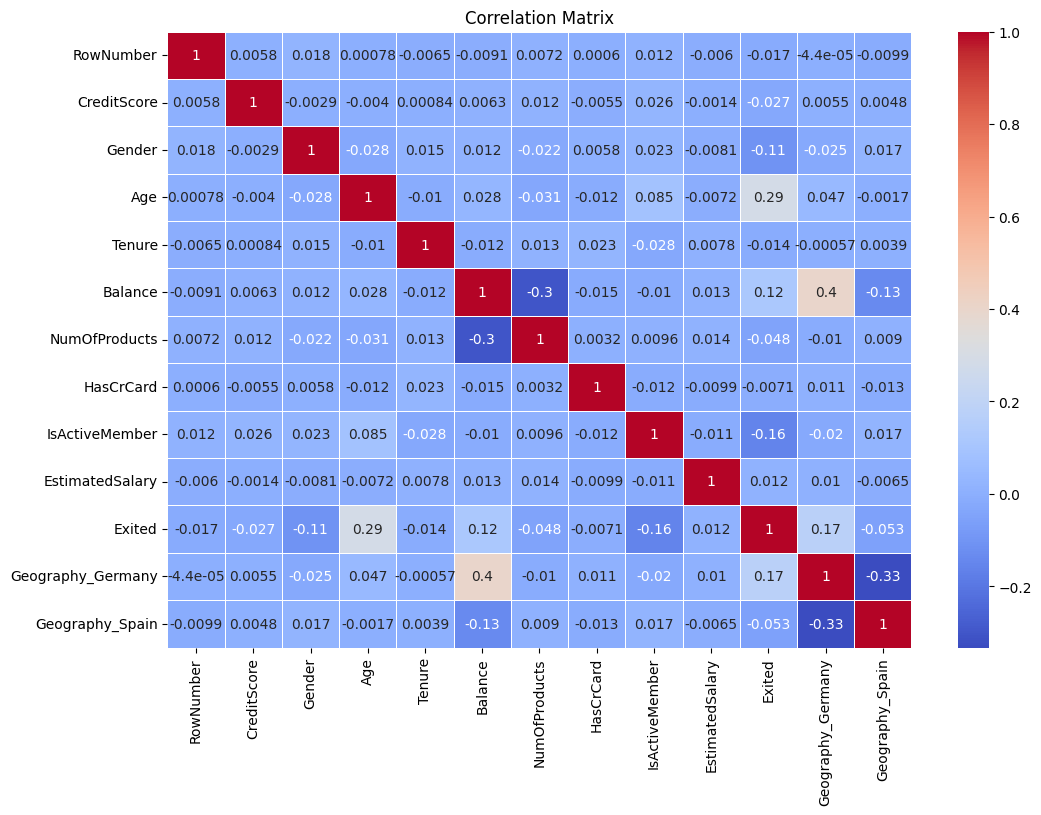

In [ ]:
correlation_matrix=data.corr()
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Get correlations of all features with the target variable 'Exited'
target_correlation = correlation_matrix['Exited'].sort_values(ascending=False)

print("Features with the highest positive correlation with 'Exited':")
print(target_correlation[target_correlation > 0.2])

print("\nFeatures with the highest negative correlation with 'Exited':")
print(target_correlation[target_correlation < -0.2])


Features with the highest positive correlation with 'Exited':
Exited    1.000000
Age       0.285323
Name: Exited, dtype: float64

Features with the highest negative correlation with 'Exited':
Series([], Name: Exited, dtype: float64)


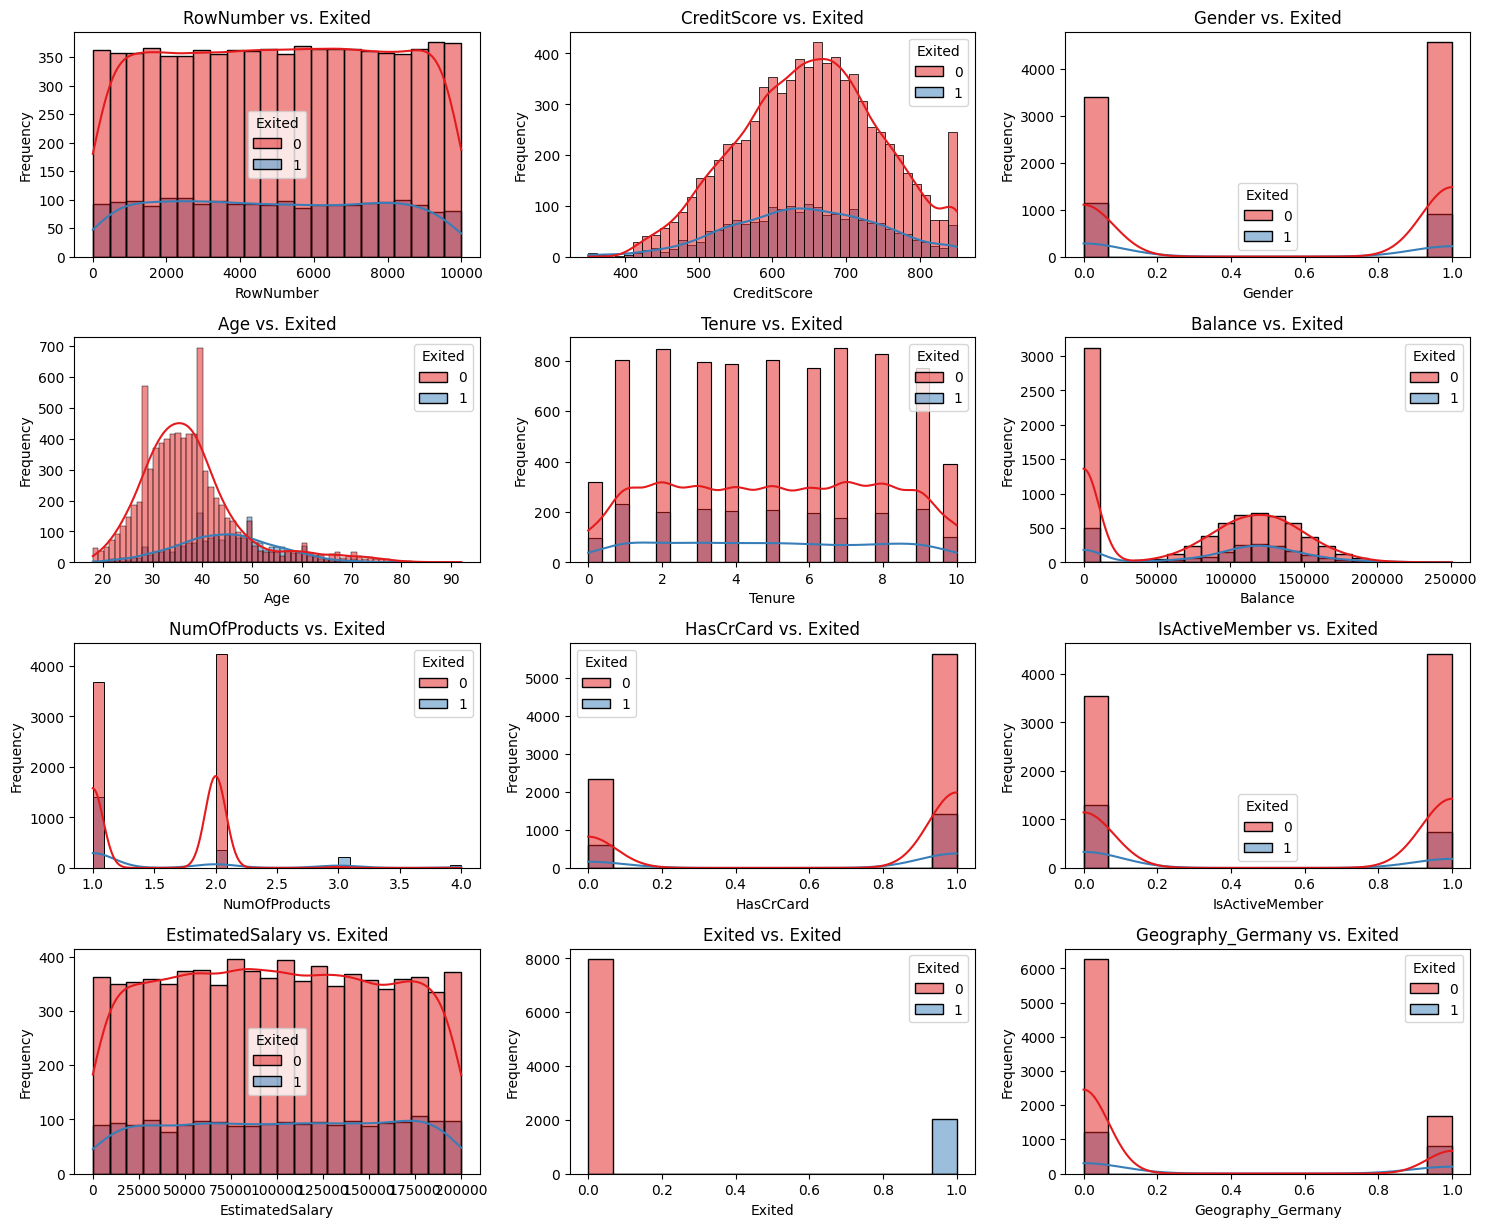

In [ ]:
features = data.columns[:-1]  # Exclude the 'Exited' column

# Create subplots
fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for feature, ax in zip(features, axes):
    sns.histplot(x=feature, hue='Exited', data=data, kde=True, ax=ax, palette='Set1')
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight = 'balanced',random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.86
Confusion Matrix:
 [[1554   53]
 [ 219  174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42)
xgb_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.83
Confusion Matrix:
 [[1419  188]
 [ 144  249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.57      0.63      0.60       393

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000

